In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pegel_df = pd.read_csv('AL_Oberwasser.txt',delimiter=';')
M1_p_df = pd.read_csv('M1_Druck.txt',delimiter=';')
M2_p_df = pd.read_csv('M2_Druck.txt',delimiter=';')
M1_LA_df = pd.read_csv('M1_LA.txt',delimiter=';')
M2_LA_df = pd.read_csv('M2_LA.txt',delimiter=';')

In [3]:
pegel_df['Timestamp'] = pegel_df['TIMESTAMP UNIX']+pegel_df['TIMESTAMP MS']/1000.
M1_p_df['Timestamp'] = M1_p_df['TIMESTAMP UNIX']+M1_p_df['TIMESTAMP MS']/1000.
M2_p_df['Timestamp'] = M2_p_df['TIMESTAMP UNIX']+M2_p_df['TIMESTAMP MS']/1000.
M1_LA_df['Timestamp'] = M1_LA_df['TIMESTAMP UNIX']+M1_LA_df['TIMESTAMP MS']/1000.
M2_LA_df['Timestamp'] = M2_LA_df['TIMESTAMP UNIX']+M2_LA_df['TIMESTAMP MS']/1000.

In [4]:
pegel_df.set_index('Timestamp',inplace=True)
M1_p_df.set_index('Timestamp',inplace=True)
M2_p_df.set_index('Timestamp',inplace=True)
M1_LA_df.set_index('Timestamp',inplace=True)
M2_LA_df.set_index('Timestamp',inplace=True)

In [5]:
pegel_df.drop(columns=['VARIABLE','TIMESTAMP UNIX', 'TIMESTAMP MS'],inplace=True)
M1_p_df.drop(columns=['VARIABLE','TIMESTAMP UNIX', 'TIMESTAMP MS'],inplace=True)
M2_p_df.drop(columns=['VARIABLE','TIMESTAMP UNIX', 'TIMESTAMP MS'],inplace=True)
M1_LA_df.drop(columns=['VARIABLE','TIMESTAMP UNIX', 'TIMESTAMP MS'],inplace=True)
M2_LA_df.drop(columns=['VARIABLE','TIMESTAMP UNIX', 'TIMESTAMP MS'],inplace=True)

pegel_df.rename(columns={'VALUE': 'TB-Pegel'},inplace=True)
M1_p_df.rename(columns={'VALUE': 'M1-Druck'},inplace=True)
M2_p_df.rename(columns={'VALUE': 'M2-Druck'},inplace=True)
M1_LA_df.rename(columns={'VALUE': 'M1-LA'},inplace=True)
M2_LA_df.rename(columns={'VALUE': 'M2-LA'},inplace=True)


In [6]:
UT_df = pegel_df.join([M1_LA_df,M1_p_df,M2_LA_df,M2_p_df],how='outer').sort_index()

In [7]:
UT_df.to_csv('UT_df.csv')

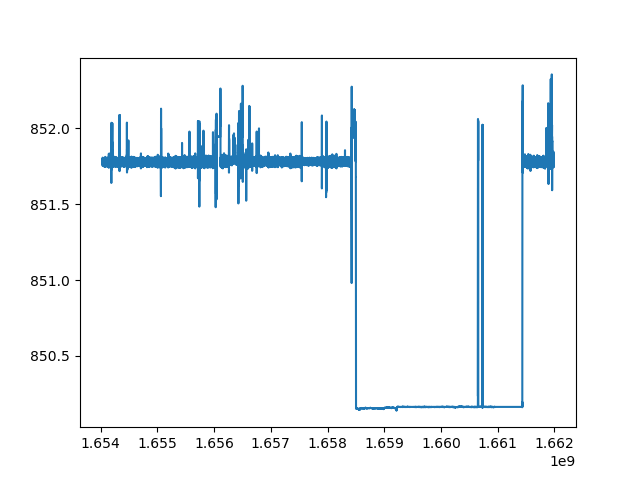

In [8]:
%matplotlib widget
fig1 = plt.figure()
t_vec = pegel_df.index.to_numpy()
pegel = pegel_df['TB-Pegel'].to_numpy()
plt.plot(t_vec,pegel)

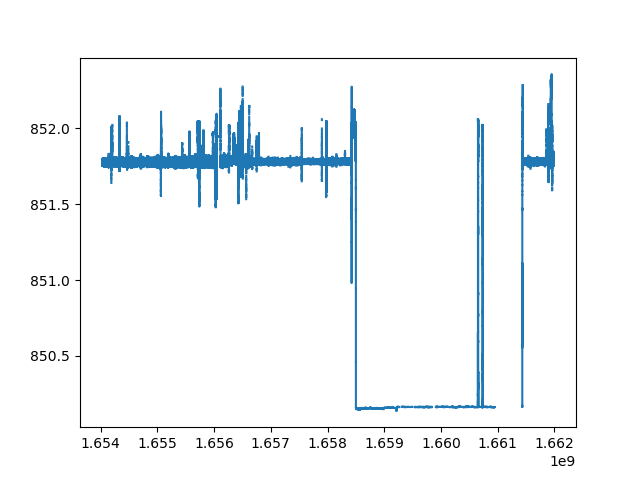

In [9]:
%matplotlib widget
fig2 = plt.figure()
t_vec = UT_df.index.to_numpy()
pegel = UT_df['TB-Pegel'].to_numpy()
plt.plot(t_vec,pegel)